In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d
import scipy.ndimage
from scipy.signal import convolve

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# point cloud 파일이 들어있는 폴더 경로
pc_folder = "/media/rtlink/JetsonSSD-256/socap_dataset/backup/pc/"

# imu 파일이 들어있는 폴더 경로
imu_folder = "/media/rtlink/JetsonSSD-256/socap_dataset/backup/imu/"

In [3]:
# Surface Roughness, angular_velocity, linear_acceleration 값을 저장할 리스트 생성
roughness_list = []


In [4]:
# 포인트 클라우드 파일 순서대로 처리
for i, file in enumerate(sorted(os.listdir(pc_folder))):
    # point cloud 파일 읽기
    pcd_file = os.path.join(pc_folder, file)
    pcd = o3d.io.read_point_cloud(pcd_file)

    # Normal 벡터 추정
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.03, max_nn=30))

    # Moment of Inertia 계산
    cov = np.cov(np.asarray(pcd.points).T)
    # print(cov)
    evals, evecs = np.linalg.eigh(cov)
    radii = np.sqrt(evals)

    # Surface Roughness 계산
    center = np.asarray(pcd.get_center())
    roughness = 0
    for i in range(len(pcd.points)):
        point = np.asarray(pcd.points[i])
        vec = point - center
        dist = np.linalg.norm(np.dot(vec, evecs) / radii)
        roughness += dist
    roughness /= len(pcd.points)
    roughness_list.append(roughness)

[[ 6.92552294 -0.05795976  1.46351002]
 [-0.05795976  0.15878108 -0.01430991]
 [ 1.46351002 -0.01430991  0.31497308]]
[[ 7.15282903e+00 -1.02771457e-02  1.54728727e+00]
 [-1.02771457e-02  1.65851479e-01 -4.62591205e-03]
 [ 1.54728727e+00 -4.62591205e-03  3.38300159e-01]]
[[6.72216229e+00 4.76687910e-02 1.40430443e+00]
 [4.76687910e-02 1.72499445e-01 6.68373091e-03]
 [1.40430443e+00 6.68373091e-03 3.00620460e-01]]
[[ 6.55210168 -0.06683935  1.3549067 ]
 [-0.06683935  0.16689441 -0.01316508]
 [ 1.3549067  -0.01316508  0.286418  ]]
[[ 6.66153414e+00 -2.12572000e-02  1.39737239e+00]
 [-2.12572000e-02  1.58270117e-01 -5.12263252e-03]
 [ 1.39737239e+00 -5.12263252e-03  2.98609891e-01]]
[[ 6.43156191e+00 -3.29933309e-02  1.33252825e+00]
 [-3.29933309e-02  1.62587402e-01 -5.86852559e-03]
 [ 1.33252825e+00 -5.86852559e-03  2.82123424e-01]]
[[ 6.97300463 -0.06459079  1.48113995]
 [-0.06459079  0.1605518  -0.0138091 ]
 [ 1.48113995 -0.0138091   0.3193854 ]]
[[ 6.94206844 -0.02391749  1.49880645]


In [15]:
angular_velocity_list = []
linear_acceleration_list = []

for i, file in enumerate(sorted(os.listdir(imu_folder))):
    # imu 파일 읽기
    imu_file = os.path.join(imu_folder, file)
    # print(imu_file)
    imu_data = pd.read_csv(imu_file)

    # angular_velocity 평균 계산
    angular_velocity_mean = imu_data[["angular_velocity_x", "angular_velocity_y", "angular_velocity_z"]].values
    angular_velocity_list.append(np.mean(angular_velocity_mean))
    # angular_velocity_list.append(angular_velocity_mean)
    # print(angular_velocity_list)

    # linear_acceleration 평균 계산
    linear_acceleration_mean = imu_data[["linear_acceleration_x", "linear_acceleration_y", "linear_acceleration_z"]].values
    # linear_acceleration_list.append(linear_acceleration_mean)
    linear_acceleration_list.append(np.mean(linear_acceleration_mean))
print(roughness_list)
print(angular_velocity_list)
print(linear_acceleration_list)

print(len(roughness_list))
print(len(angular_velocity_list))
print(len(linear_acceleration_list))

[1.5763159936373328, 1.5726155696305244, 1.5756439337031645, 1.576167380371603, 1.5767650447417572, 1.5738666725536068, 1.5789070546631532, 1.5757797615579487, 1.5546691977016298, 1.5751863979842624, 1.575324940942117, 1.5740845792809555, 1.5754928950725957, 1.574435022268046, 1.5756479745375955, 1.5770314846346356, 1.5756898785180906, 1.5748608435969647, 1.5736001582644807, 1.5746726183004462, 1.5499184421016339, 1.5764422394961164, 1.5758813139577488, 1.5774991835664292, 1.5764118525505442, 1.5790524078955932, 1.5748099509369429, 1.5794488174484267, 1.5772398754332904, 1.559848560802259, 1.57148717550551, 1.5811586399483624, 1.5847848204394246, 1.5771125477061572, 1.5764177301079707, 1.4595522375827137, 1.5774683436489312, 1.4872225386109774, 1.5762293493528627, 1.5736629959336719, 1.5708421713322798, 1.5763516142315972, 1.5746955182786544, 1.5760846218085747, 1.5739675081461266, 1.5737114845129678, 1.575983440741805, 1.5763723562435152, 1.5721348454004156, 1.576110306405234, 1.57327

In [6]:
#linear_acceleration 적분
arr = np.array(linear_acceleration_list)
arr = arr - arr.mean()
arr_abs = np.abs(arr)
arr = arr / arr_abs.max()
arr = arr.cumsum()
# arr = scipy.ndimage.gaussian_filter(arr, sigma=2)

In [7]:
arr = np.array(arr)
arr = arr - arr.mean()
arr_abs = np.abs(arr)
arr = arr / arr_abs.max()
arr = arr.cumsum()

In [8]:
rough = np.array(roughness_list)
rough = rough - rough.mean()
rough_abs = np.abs(rough)
rough = rough / rough_abs.max()
rough = rough.cumsum()
# rough = scipy.ndimage.gaussian_filter(rough, sigma=2)

In [9]:
#가우시안 필터 생성
sigma = 1
size = 11
k = np.exp(-np.square(np.linspace(-size / 2., size / 2., size)) / (2 * np.square(sigma)))

# 필터 적용
rough = convolve(rough, k / k.sum(), mode='same')
arr = convolve(arr, k / k.sum(), mode='same')

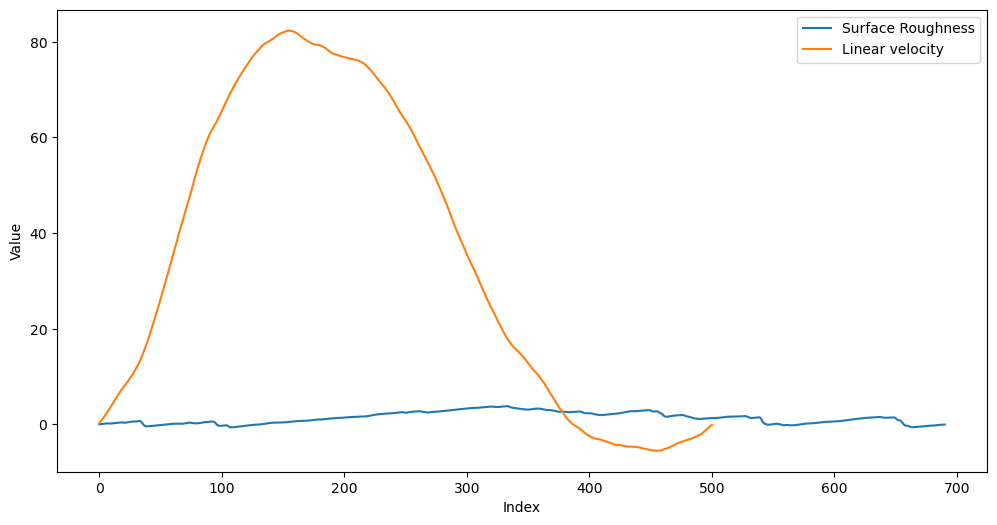

In [10]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(rough, label="Surface Roughness")
# ax.plot(angular_velocity_list, label="Angular Velocity")
# ax.plot(linear_acceleration_list, label="Linear Acceleration")
ax.plot(arr, label="Linear velocity")


ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

In [11]:
print(np.corrcoef(rough, arr)[0,1])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 691 and the array at index 1 has size 501

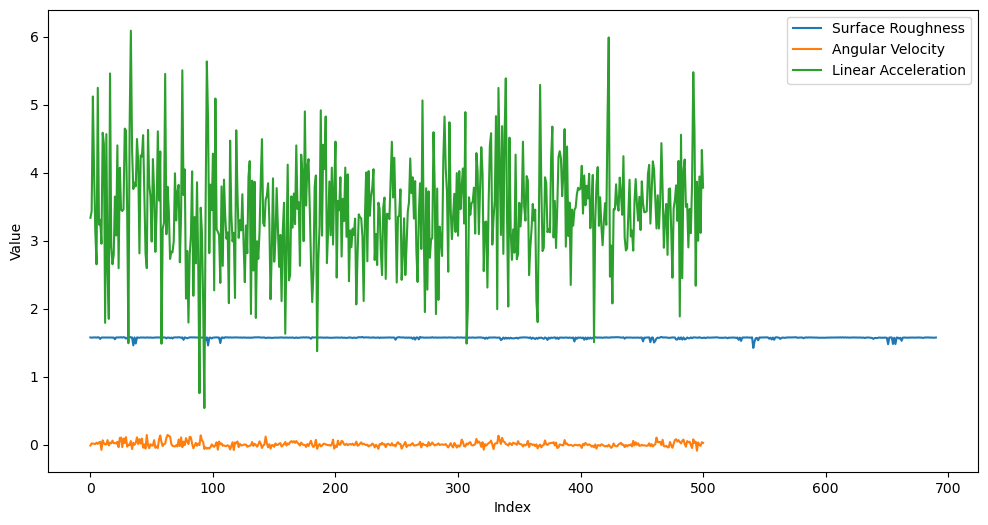

In [12]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(roughness_list, label="Surface Roughness")
ax.plot(angular_velocity_list, label="Angular Velocity")
ax.plot(linear_acceleration_list, label="Linear Acceleration")

ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

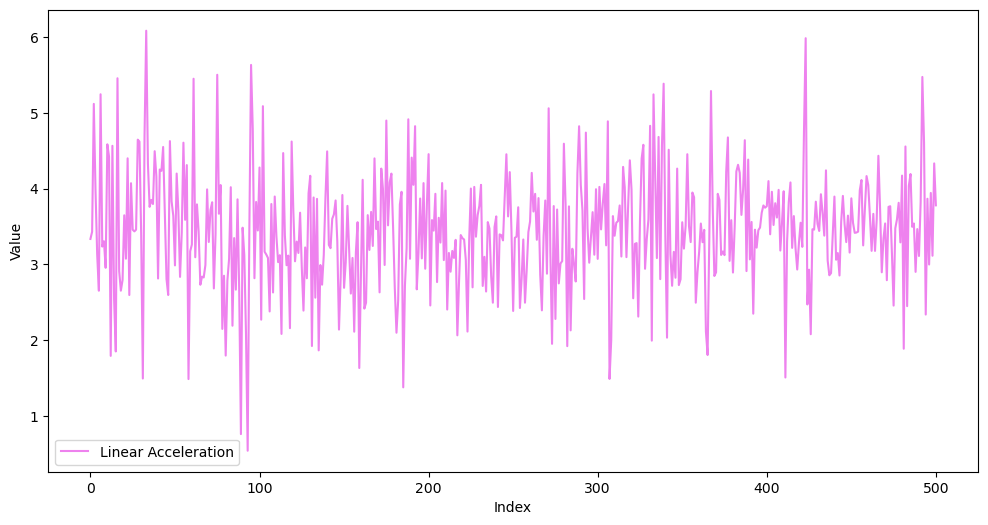

In [13]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# ax.plot(roughness_list, label="Surface Roughness")
# ax.plot(angular_velocity_list, label="Angular Velocity", color = 'limegreen')
ax.plot(linear_acceleration_list, label="Linear Acceleration", color = 'violet')

ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

NameError: name 'df' is not defined

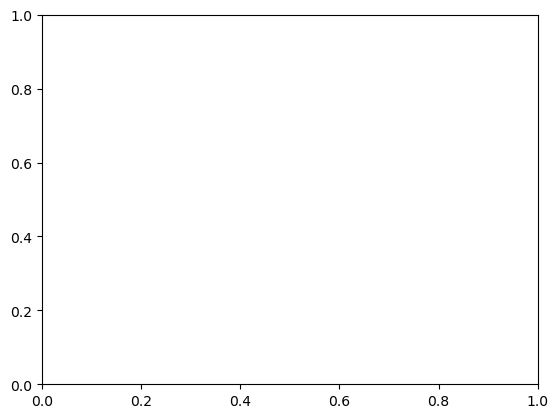

In [14]:
# 그래프 그리기
fig, ax = plt.subplots()

# 데이터프레임에서 열의 최대 및 최소값 계산하기
roughness_max = df['surface roughness'].max()
roughness_min = df['surface roughness'].min()
angular_velocity_max = df['angular_velocity'].max()
angular_velocity_min = df['angular_velocity'].min()
linear_acceleration_max = df['linear_acceleration'].max()
linear_acceleration_min = df['linear_acceleration'].min()

# y축 범위 설정하기
ax.set_ylim([min(roughness_min, angular_velocity_min, linear_acceleration_min), max(roughness_max, angular_velocity_max, linear_acceleration_max)])

# 그래프 그리기
ax.plot(ax=ax)

# 결과 출력
plt.show()